In [1]:
#Loading the MNIST dataset in Keras
import keras
from keras.callbacks import History 
history = History()
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [4]:
#import the MNIST dataset from Keras

batch_size = 128

num_classes = 10

epochs = 25


In [5]:
# input image dimensions

img_rows, img_cols = 28, 28

In [6]:
#MNIST dataset using the Keras



from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
#normalize inputs from 0-255 to 0-1



if K.image_data_format() == 'channels_first':

    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)

    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)

else:

    x_train = x_train.reshape(x_train.shape[0],img_rows, img_cols, 1)

    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
#convert the dependent variable in the form of integers to a binary class matrix



y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
#Design a Model



model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),

                 activation='relu',

                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#Compile and Train Model

model.compile(loss=keras.losses.categorical_crossentropy,

              optimizer=keras.optimizers.Adadelta(),

              metrics=['accuracy'])



model.fit(x_train, y_train,

          batch_size=batch_size,

          epochs=epochs,

          verbose=1,

          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])

print('Test accuracy:', score[1])

model.save("first_test")




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/25





60000/60000 [==============================] - 97s 2ms/step - loss: 0.2636 - acc: 0.9185 - val_loss: 0.0512 - val_acc: 0.9847
Epoch 2/25
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0873 - acc: 0.9741 - val_loss: 0.0389 - val_acc: 0.9865
Epoch 3/25
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0650 - acc: 0.9802 - val_loss: 0.0352 - val_acc: 0.9889
Epoch 4/25
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0553 - acc: 0.9836 - val_loss: 0.0314 - val_acc: 0.9896
Epoch 5/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0478 - acc: 0.9853 - val_loss: 0.0287 - val_acc: 0.9900
Epoch 6/25
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0293 - val_acc: 0.9898
Epoch 7/25
60000/60000

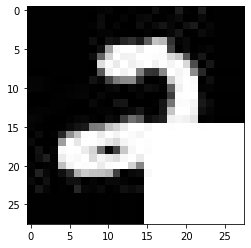

2


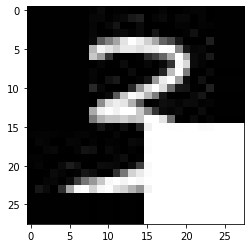

3


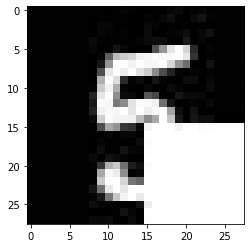

5


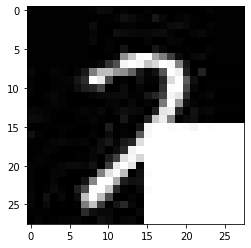

7


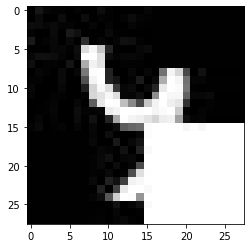

4


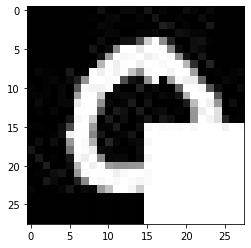

0


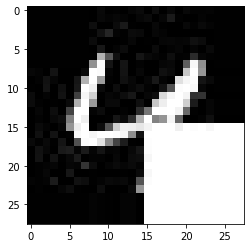

4


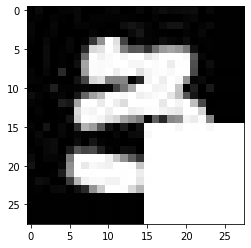

3


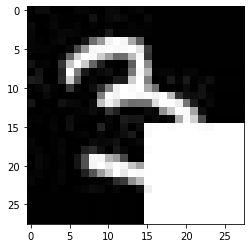

3


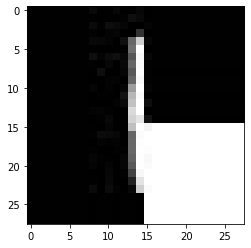

1


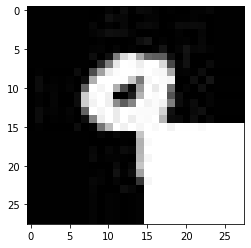

9


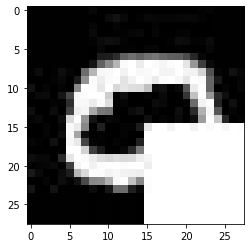

0


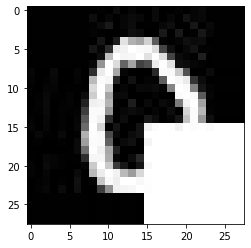

0


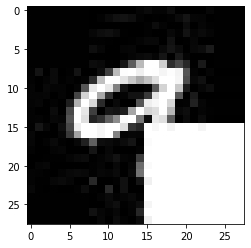

9


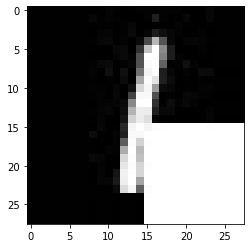

1


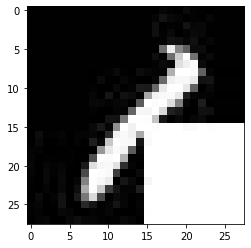

2


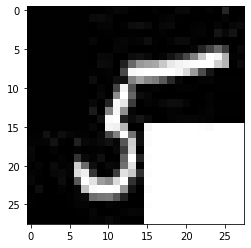

5


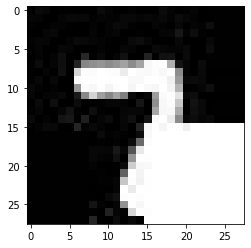

7


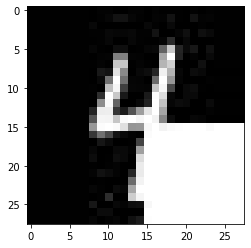

4


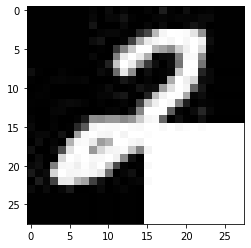

2


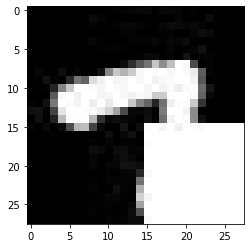

7


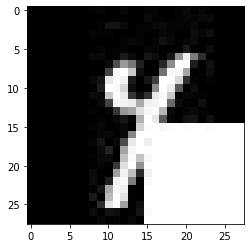

4


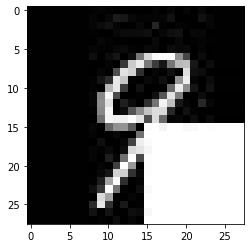

9


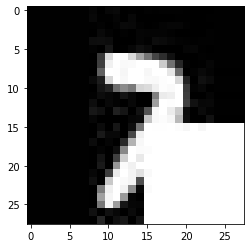

7


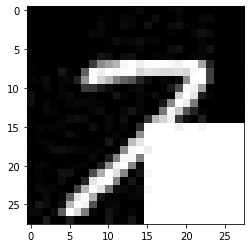

7


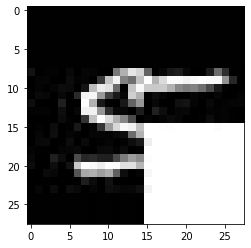

5


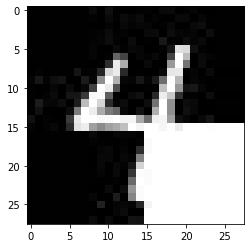

4


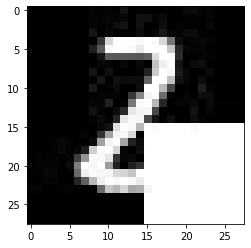

2


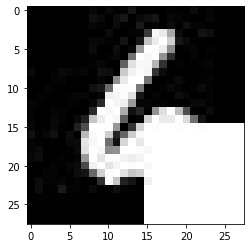

6


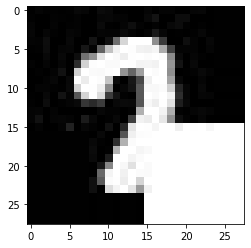

2


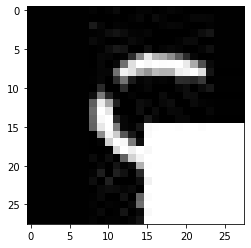

5


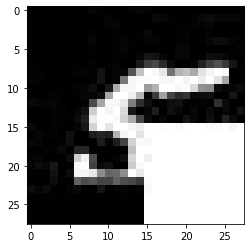

5


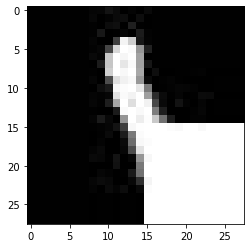

1


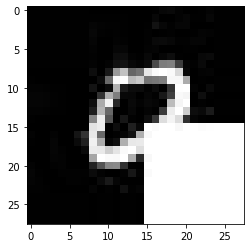

9


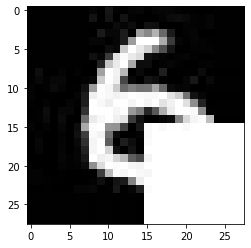

6


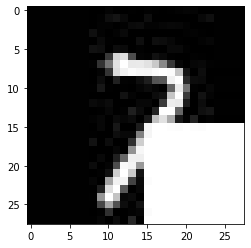

7


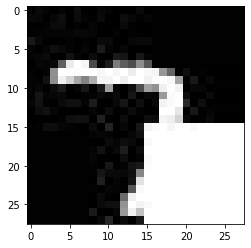

7


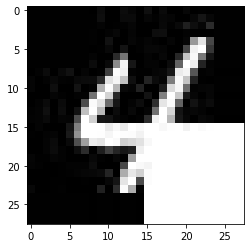

4


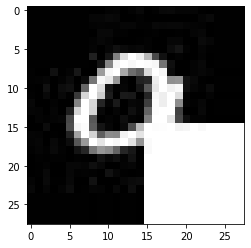

9


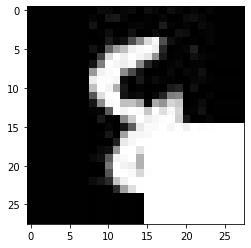

8


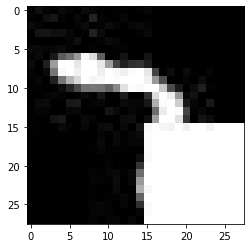

7


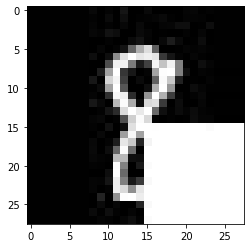

8


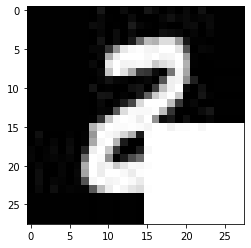

2


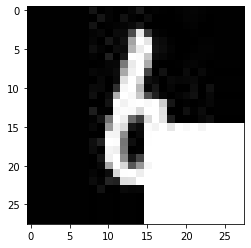

6


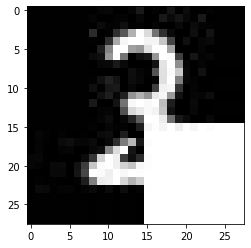

3


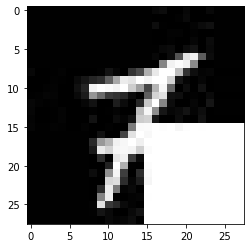

7


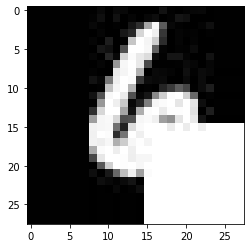

6


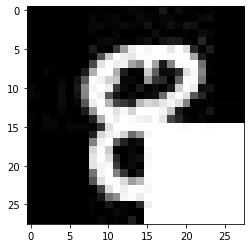

8


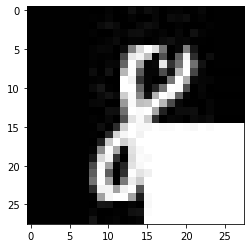

8


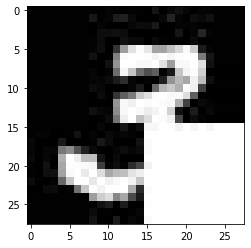

3


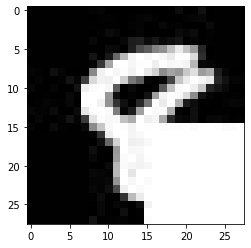

8


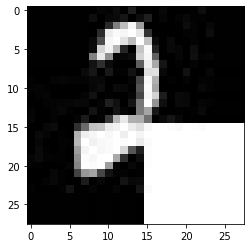

2


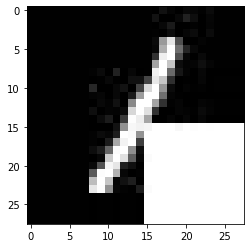

1


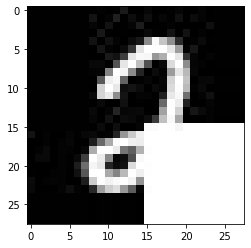

2


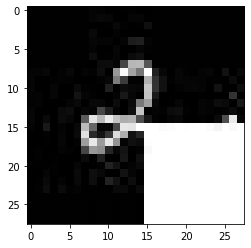

2


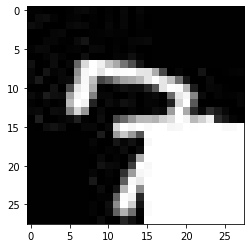

7


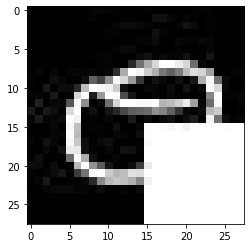

0


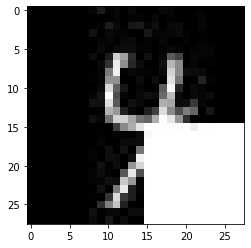

4


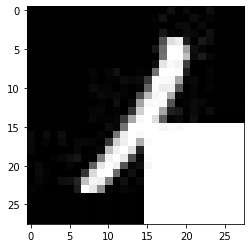

1


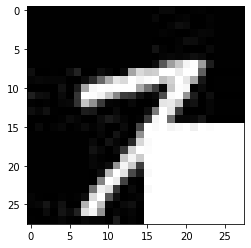

7


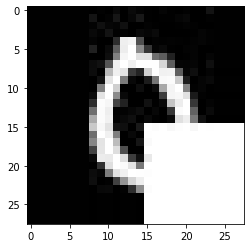

0


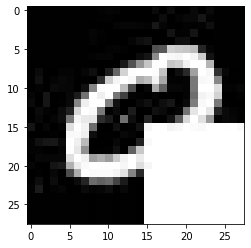

0


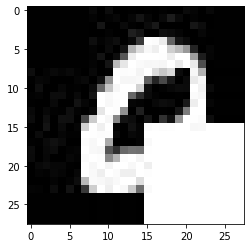

0


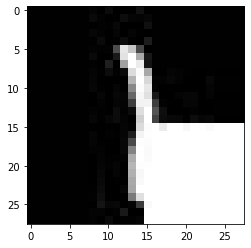

1


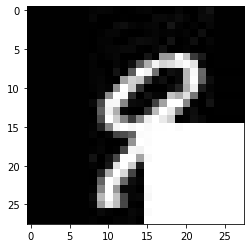

4


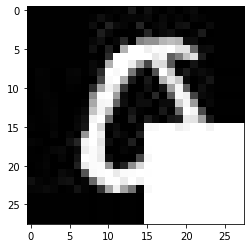

0


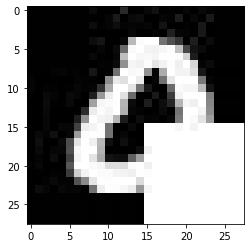

0


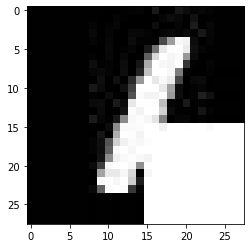

1


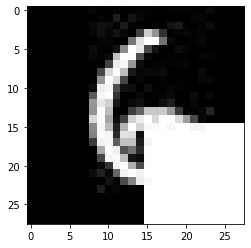

6


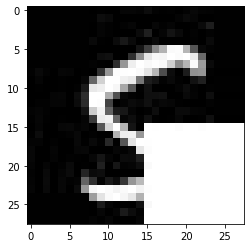

5


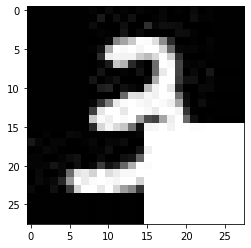

3


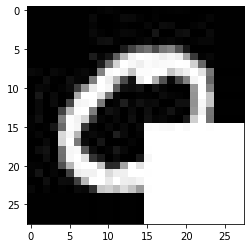

0


In [15]:
#Test with Handwritten Digits
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt
import datetime as t
from skimage.color import rgb2gray
import cv2
import os
import glob


img_dir = ('') # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
images = []
for f1 in files:
    img = cv2.imread(f1)
    images.append(img)
    images2 = np.expand_dims(img,axis=0)
    images2 = np.expand_dims(images2,axis=3)
    #images2 = np.array(img)
    gray = rgb2gray(images2)
    gray = gray.reshape(1,img_rows, img_cols,1)
    gray /= 255
    gray = np.dot(images2[...,:3], [0.299, 0.587, 0.114])
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.show()
    model = load_model("first_test")
    # predict digit
    prediction = model.predict(gray)
    print(prediction.argmax())
